In [1]:
# from src.utils import model_selection, create_plots
from src.utils import create_plots, model_comparasion, tradeoff_plot
# Replace model_selection with model_selection_parallel 
from src.load_results import model_selection_parallel as model_selection

import seaborn as sns
from pathlib import Path
import pandas as pd
import math

In [30]:
Vanilla_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"vanilla/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("0","1","2","3","4"),
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=20,
    index_column_names = ["lr"],
    save_path = "results/Moji_Vanilla_df.pkl"
    )

In [31]:
Vanilla_df

,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
lr,,,,,,,,
0.003,2,0.620993,0.724375,0.001723,0.600562,0.718430,0.011916,G:\Experimental_results\vanilla\Moji\0\opt.yaml
0.003,11,0.633829,0.729125,0.000000,0.620341,0.726557,0.000000,G:\Experimental_results\vanilla\Moji\1\opt.yaml
0.003,2,0.624404,0.723375,0.002585,0.603691,0.724181,0.004469,G:\Experimental_results\vanilla\Moji\2\opt.yaml
0.003,5,0.654673,0.731875,0.000000,0.633144,0.727807,0.000000,G:\Experimental_results\vanilla\Moji\3\opt.yaml
0.003,2,0.627612,0.724500,0.001206,0.601611,0.717929,0.010048,G:\Experimental_results\vanilla\Moji\4\opt.yaml


In [2]:
Moji_Adv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_Adv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_Adv_df.pkl"
    )

In [3]:
Moji_Adv_df

epoch  dev_fairness  \
adv_lambda adv_num_subDiscriminator adv_diverse_lambda                        
0.001259   1                        0.0                     7      0.632872   
                                    0.0                     7      0.614186   
                                    0.0                    10      0.623298   
                                    0.0                     4      0.626120   
                                    0.0                    11      0.624915   
...                                                       ...           ...   
794.328235 1                        0.0                     0      1.000000   
                                    0.0                     1      1.000000   
                                    0.0                    30      0.895489   
                                    0.0                     1      1.000000   
                                    0.0                     0      0.943746   

                                                        dev_performance  \
adv_lambda adv_num_subDiscriminator adv_diverse_lambda                    
0.001259   1                        0.0                        0.724875   
                                    0.0                        0.724375   
                                    0.0                        0.724500   
                                    0.0                        0.723750   
                                    0.0                        0.724500   
...                                                                 ...   
794.328235 1                        0.0                        0.500000   
                                    0.0                        0.500000   
                                    0.0                        0.681250   
                                    0.0                        0.500000   
                                    0.0                        0.599250   

                                                         dev_DTO  \
adv_lambda adv_num_subDiscriminator adv_diverse_lambda             
0.001259   1                        0.0                 0.000000   
                                    0.0                 0.000000   
                                    0.0                 0.000000   
                                    0.0                 0.005846   
                                    0.0                 0.001206   
...                                                          ...   
794.328235 1                        0.0                 0.000000   
                                    0.0                 0.000000   
                                    0.0                 0.094672   
                                    0.0                 0.000000   
                                    0.0                 0.056254   

                                                        test_fairness  \
adv_lambda adv_num_subDiscriminator adv_diverse_lambda                  
0.001259   1                        0.0                      0.607641   
                                    0.0                      0.595042   
                                    0.0                      0.597945   
                                    0.0                      0.603132   
                                    0.0                      0.608225   
...                                                               ...   
794.328235 1                        0.0                      1.000000   
                                    0.0                      1.000000   
                                    0.0                      0.870439   
                                    0.0                      1.000000   
                                    0.0                      0.932734   

                                                        test_performance  \
adv_lambda adv_num_subDiscriminator adv_diverse_lambda                     
0.001259   1                        0.0                         0

index epoch       dev_fairness            \
                                  mean   var         mean       var   
35  (3.1622776601683795, 1, 0.0)  10.2  29.7     0.918121  0.000111   

   dev_performance             dev_DTO           test_fairness            \
              mean       var      mean       var          mean       var   
35        0.736425  0.000185  0.037474  0.000943      0.917136  0.000322   

   test_performance           test_DTO           final_DTO log_lambda  
               mean      var      mean       var                       
35         0.744886  0.00019  0.038799  0.000925  0.066922        0.5

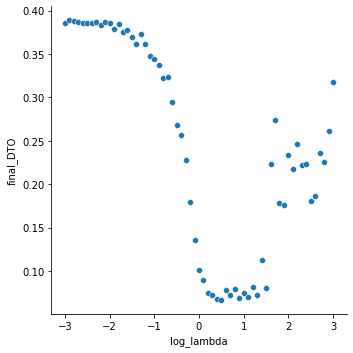

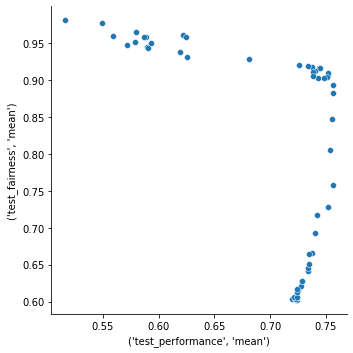

In [33]:
create_plots(input_df = Moji_Adv_df)

In [34]:
Moji_DAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_DAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_DAdv_df.pkl"
    )


index epoch       dev_fairness            \
                                     mean   var         mean       var   
179  (3.1622776601683795, 3, 100.0)   8.6  25.3     0.925327  0.000212   

    dev_performance             dev_DTO          test_fairness            \
               mean       var      mean      var          mean       var   
179         0.73735  0.000066  0.023413  0.00009       0.92475  0.000468   

    test_performance            test_DTO           final_DTO log_lambda  
                mean       var      mean       var                       
179         0.746862  0.000052  0.029076  0.000206  0.063965        0.5

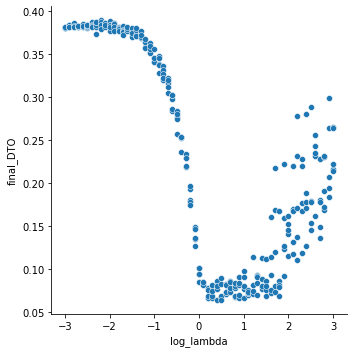

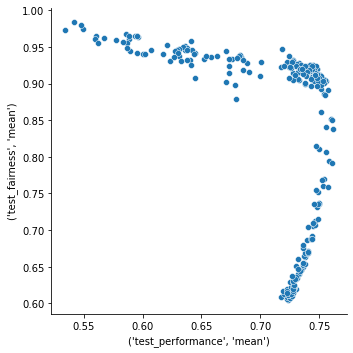

In [35]:
create_plots(input_df = Moji_DAdv_df)

In [36]:
Moji_GatedAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune2/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_GatedAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_GatedAdv_df.pkl"
    )

index epoch      dev_fairness            \
                                 mean  var         mean       var   
47  (50.11872336272725, 1, 0.0)   7.2  3.2     0.942501  0.000086   

   dev_performance             dev_DTO           test_fairness            \
              mean       var      mean       var          mean       var   
47        0.731275  0.000013  0.037601  0.000123      0.933813  0.000069   

   test_performance            test_DTO           final_DTO log_lambda  
               mean       var      mean       var                       
47         0.739085  0.000026  0.037262  0.000627  0.042901        1.7

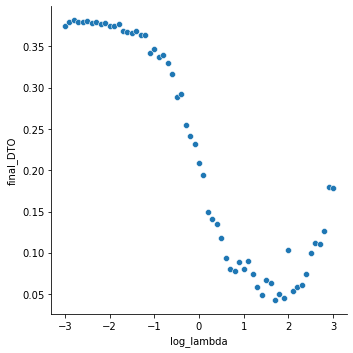

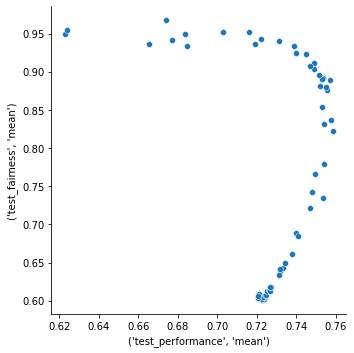

In [37]:
create_plots(
    input_df = Moji_GatedAdv_df
    )

In [38]:
Moji_BTGatedAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune2/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_BTGatedAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_BTGatedAdv_df.pkl"
    )

index epoch        dev_fairness           dev_performance  \
                    mean    var         mean       var            mean   
40  (10.0, 1, 0.0)  15.4  203.3     0.915839  0.001516        0.708675   

               dev_DTO           test_fairness           test_performance  \
         var      mean       var          mean       var             mean   
40  0.001581  0.106046  0.000687      0.904159  0.002921         0.713853   

              test_DTO           final_DTO log_lambda  
         var      mean       var                       
40  0.001716  0.119564  0.000846  0.084921        1.0

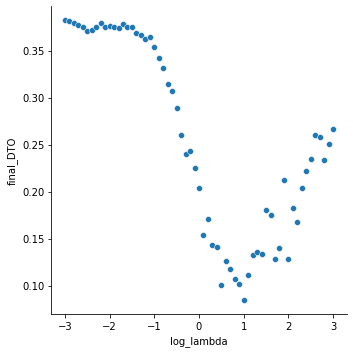

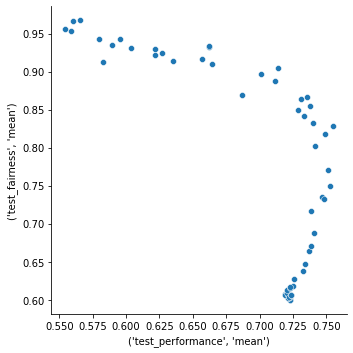

In [39]:
create_plots(
    input_df = Moji_BTGatedAdv_df, 
    )

In [40]:
Moji_GatedDAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune3/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_GDAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_GatedDAdv_df.pkl"
    )

index epoch       dev_fairness            \
                                   mean   var         mean       var   
358  (125.89254117941688, 3, 0.1)  21.8  63.7     0.971506  0.000096   

    dev_performance             dev_DTO           test_fairness            \
               mean       var      mean       var          mean       var   
358        0.718175  0.000083  0.041085  0.000119      0.959129  0.000242   

    test_performance           test_DTO           final_DTO log_lambda  
                mean       var     mean       var                       
358         0.723556  0.000099  0.04495  0.000152  0.059097        2.1

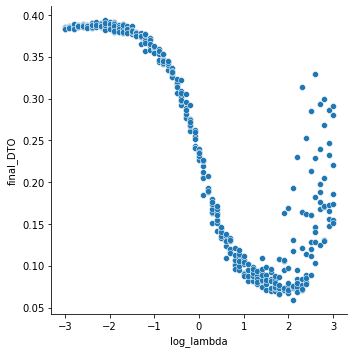

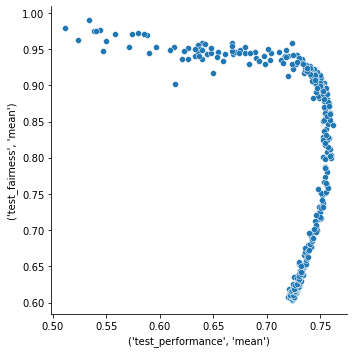

In [41]:
create_plots(
    input_df = Moji_GatedDAdv_df, 
    )

In [42]:
Moji_FairBatch_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"FairBatch/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "FairBatch",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['DyBTObj', 'DyBTalpha', 'DyBTinit'],
    save_path = "results/Moji_FairBatch_df.pkl"
    )

index epoch      dev_fairness            \
                                   mean  var         mean       var   
20  (stratified_y, 0.1, original)   7.0  3.5     0.914526  0.000036   

   dev_performance             dev_DTO           test_fairness            \
              mean       var      mean       var          mean       var   
20         0.74605  0.000015  0.014685  0.000129      0.904373  0.000067   

   test_performance            test_DTO           final_DTO  
               mean       var      mean       var            
20         0.751488  0.000033  0.024711  0.000138  0.002582

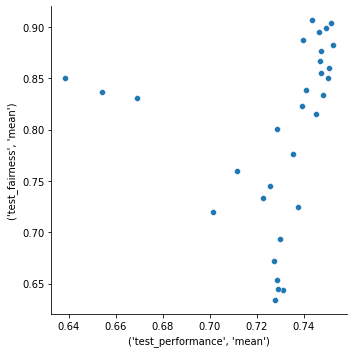

In [43]:
create_plots(
    input_df = Moji_FairBatch_df
    )

In [44]:
Moji_BTFairBatch_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"FairBatch/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "BTInitFairBatch",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['DyBTObj', 'DyBTalpha', 'DyBTinit'],
    save_path = "results/Moji_BTFairBatch_df.pkl"
    )

In [3]:
Moji_OldFairBatch_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"Original_FairBatch/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "Original_FairBatch",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['DyBTObj', 'DyBTalpha', 'DyBTinit'],
    save_path = "results/Moji_OldFairBatch_df.pkl",
    n_jobs=0
    )

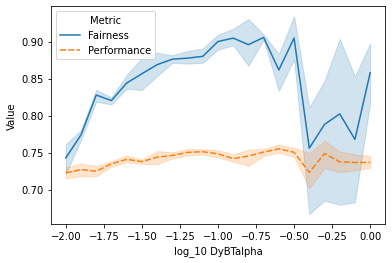

In [4]:
tradeoff_plot(Moji_OldFairBatch_df, "DyBTalpha", "FairBatch_hypertune")

In [3]:
Moji_INLP_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"INLP/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "INLP",
    # model_id= "INLP_True",
    model_id= "INLP",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['INLP_by_class', 'INLP_discriminator_reweighting', 'INLP_min_acc'],
    # save_path = "results/Moji_INLP_df.pkl",
    n_jobs=0,
    return_all=True
    )

100%|██████████| 8/8 [00:07<00:00,  1.01it/s]


In [4]:
_Moji_INLP_df = Moji_INLP_df.reset_index()
# _Moji_INLP_df[""]
_Moji_INLP_df["INLP_discriminator_reweighting"] = _Moji_INLP_df["INLP_discriminator_reweighting"].fillna("None")

_Moji_INLP_df

,INLP_by_class,INLP_discriminator_reweighting,INLP_min_acc,index_epoch,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
0,False,balanced,0.5,0,0,0.607997,0.722875,0.391326,0.589516,0.720555,0.392763,G:\Experimental_results\INLP\Moji\INLP_False_b...
1,False,balanced,0.5,1,1,0.608123,0.722875,0.391200,0.593346,0.721680,0.388799,G:\Experimental_results\INLP\Moji\INLP_False_b...
2,False,balanced,0.5,10,10,0.608300,0.721750,0.391033,0.589869,0.720555,0.392400,G:\Experimental_results\INLP\Moji\INLP_False_b...
3,False,balanced,0.5,100,100,0.998882,0.509500,0.296392,0.970752,0.520130,0.282264,G:\Experimental_results\INLP\Moji\INLP_False_b...
4,False,balanced,0.5,101,101,0.998882,0.509500,0.296392,0.970752,0.520130,0.282264,G:\Experimental_results\INLP\Moji\INLP_False_b...
...,...,...,...,...,...,...,...,...,...,...,...,...
1765,True,None,0.0,95,95,0.867065,0.708125,0.125780,0.843624,0.708177,0.154426,G:\Experimental_results\INLP\Moji\INLP_True_No...
1766,True,None,0.0,96,96,0.871188,0.707500,0.121840,0.849391,0.708677,0.148596,G:\Experimental_results\INLP\Moji\INLP_True_No...
1767,True,None,0.0,97,97,0.873168,0.707750,0.119810,0.850730,0.709177,0.147173,G:\Experimental_results\INLP\Moji\INLP_True_No...
1768,True,None,0.0,98,98,0.874601,0.706500,0.118731,0.853641,0.709177,0.144276,G:\Experimental_results\INLP\Moji\INLP_True_No...


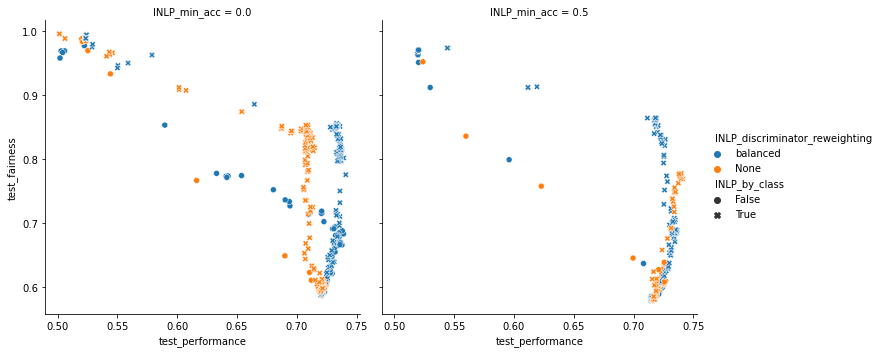

In [6]:
g = sns.relplot(data=_Moji_INLP_df, y="test_fairness", x="test_performance", style="INLP_by_class", hue="INLP_discriminator_reweighting", col="INLP_min_acc")

g.savefig(Path(r"D:\Project\Fair_NLP_Classification\analysis\plots") / "INLP_hypertune", dpi=960, bbox_inches="tight") 

In [5]:
BTEO_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"GatedBT/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("GatedBT_Reweighting_stratified_y_False","GatedBT_Resampling_stratified_y_False"),
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=10,
    index_column_names = ["BT", "BTObj", "gated"],
    save_path = "results/Moji_BTEO_df.pkl"
    )

In [48]:
GatedBTEO_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"GatedBT/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("GatedBT_Reweighting_stratified_y_True","GatedBT_Resampling_stratified_y_True"),
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=10,
    index_column_names = ["BT", "BTObj", "gated"],
    save_path = "results/Moji_GatedBTEO_df.pkl"
    )

In [7]:
FairSCL_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"FairSCL/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("FSCL_"),
    GAP_metric_name = "TPR_GAP",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=20,
    index_column_names = ["fcl_lambda_y", "fcl_lambda_g"],
    save_path = "results/Moji_FairSCL_df.pkl"
    )

In [8]:
FairSCL_df

epoch  dev_fairness  dev_performance   dev_DTO  \
fcl_lambda_y fcl_lambda_g                                                   
0.001259     0.001259          0      0.828407         0.755125  0.000000   
             0.001259          0      0.830046         0.752750  0.000000   
             0.001259          0      0.854903         0.753750  0.005115   
             0.001259          0      0.847317         0.756250  0.000000   
             0.001259          0      0.839930         0.749750  0.000167   
...                          ...           ...              ...       ...   
7.943282     7.943282          7      0.901957         0.749750  0.008595   
             7.943282          5      0.885028         0.752500  0.003277   
             7.943282         11      0.892778         0.752500  0.010476   
             7.943282          3      0.900646         0.747250  0.010920   
             7.943282          9      0.895529         0.754000  0.002810   

                           test_fairness  test_performance  test_DTO  \
fcl_lambda_y fcl_lambda_g                                              
0.001259     0.001259           0.805730          0.756189  0.000000   
             0.001259           0.813405          0.759440  0.000000   
             0.001259           0.837132          0.757189  0.001813   
             0.001259           0.820693          0.757439  0.000000   
             0.001259           0.815193          0.752563  0.001659   
...                                  ...               ...       ...   
7.943282     7.943282           0.885120          0.757439  0.005907   
             7.943282           0.869048          0.758315  0.010904   
             7.943282           0.873739          0.761065  0.023775   
             7.943282           0.887742          0.755064  0.007233   
             7.943282           0.881183          0.759815  0.004749   

                                                                     opt_dir  
fcl_lambda_y fcl_lambda_g                                                     
0.001259     0.001259      G:\Experimental_results\FairSCL\Moji\FSCL_0.00...  
             0.001259      G:\Experimental_results\FairSCL\Moji\FSCL_0.00...  
             0.001259      G:\Experimental_results\FairSCL\Moji\FSCL_0.00...  
             0.001259      G:\Experimental_results\FairSCL\Moji\FSCL_0.00...  
             0.001259      G:\Experimental_results\FairSCL\Moji\FSCL_0.00...  
...                                                                      ...  
7.943282     7.943282      G:\Experimental_results\FairSCL\Moji\FSCL_7.94...  
             7.943282      G:\Experimental_results\FairSCL\Moji\FSCL_7.94...  
             7.943282      G:\Experimental_results\FairSCL\Moji\FSCL_7.94...  
             7.943282      G:\Experimental_results\FairSCL\Moji\FSCL_7.94...  
             7.943282      G:\Experimental_results\FairSCL\Moji\FSCL_7.94...  

[205 rows x 8 columns]

In [5]:
FairSCL_EO_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"FairSCL/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("FSCL_EO"),
    GAP_metric_name = "TPR_GAP",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=0,
    index_column_names = ["fcl_lambda_y", "fcl_lambda_g"],
    save_path = "results/Moji_FairSCL_EO_df.pkl"
    )

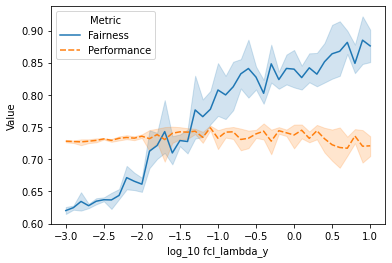

In [6]:
tradeoff_plot(FairSCL_EO_df, "fcl_lambda_y")

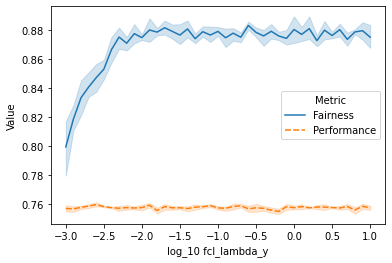

In [6]:
tradeoff_plot(FairSCL_df, "fcl_lambda_y", "FSCL_hypertune")

In [7]:
GDEO_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"GroupDifference/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("GDEO"),
    GAP_metric_name = "TPR_GAP",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=20,
    index_column_names = ["DyBTalpha"],
    save_path = "results/Moji_GDEO_df.pkl"
    )

In [8]:
GDEO_df

,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
DyBTalpha,,,,,,,,
0.001259,8,0.617703,0.725375,0.000000,0.602520,0.726932,0.000000,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,5,0.623804,0.726625,0.000000,0.599845,0.723556,0.004972,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,12,0.626252,0.727000,0.001651,0.611955,0.725431,0.000000,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,1,0.621619,0.723000,0.002759,0.607068,0.725056,0.001206,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,4,0.649351,0.731750,0.000000,0.621853,0.730558,0.000000,G:\Experimental_results\GroupDifference\Moji\G...
...,...,...,...,...,...,...,...,...
7.943282,0,0.956339,0.588000,0.043661,0.952001,0.590398,0.047999,G:\Experimental_results\GroupDifference\Moji\G...
7.943282,7,0.963213,0.568000,0.036787,0.984030,0.574519,0.015970,G:\Experimental_results\GroupDifference\Moji\G...
7.943282,5,0.913307,0.672875,0.086693,0.886987,0.672168,0.113013,G:\Experimental_results\GroupDifference\Moji\G...


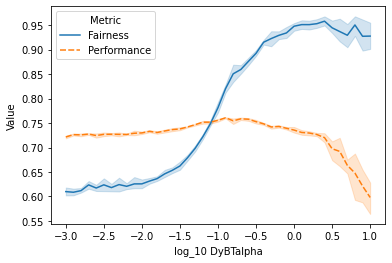

In [9]:
tradeoff_plot(GDEO_df, "DyBTalpha", "GDEO_hypertune")

In [10]:
GDMean_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"GroupDifference/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("GDMean"),
    GAP_metric_name = "TPR_GAP",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=20,
    index_column_names = ["DyBTalpha"],
    save_path = "results/Moji_GDMean_df.pkl"
    )

In [11]:
GDMean_df

,epoch,dev_fairness,dev_performance,dev_DTO,test_fairness,test_performance,test_DTO,opt_dir
DyBTalpha,,,,,,,,
0.001259,7,0.652134,0.723750,0.000863,0.631511,0.722181,0.001556,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,4,0.639089,0.730250,0.000000,0.627370,0.727807,0.000000,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,0,0.633249,0.727500,0.000000,0.611780,0.726557,0.000000,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,9,0.646453,0.721250,0.007568,0.617270,0.721055,0.005690,G:\Experimental_results\GroupDifference\Moji\G...
0.001259,5,0.629709,0.726875,0.000000,0.610959,0.725681,0.001033,G:\Experimental_results\GroupDifference\Moji\G...
...,...,...,...,...,...,...,...,...
7.943282,13,0.901742,0.630875,0.098258,0.908096,0.636909,0.091904,G:\Experimental_results\GroupDifference\Moji\G...
7.943282,7,0.996309,0.523125,0.003691,0.990514,0.522756,0.009486,G:\Experimental_results\GroupDifference\Moji\G...
7.943282,1,0.968170,0.621875,0.031830,0.956407,0.634909,0.043593,G:\Experimental_results\GroupDifference\Moji\G...


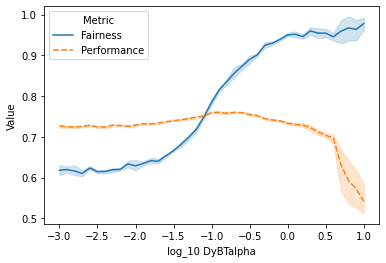

In [12]:
tradeoff_plot(GDMean_df, "DyBTalpha", "GDMean_hypertune")

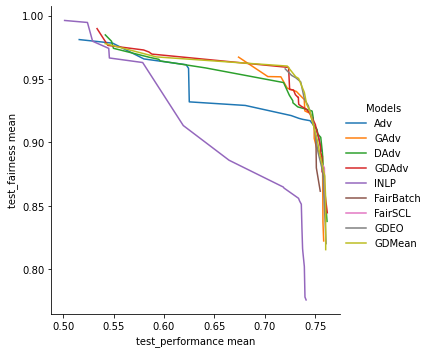

In [53]:
_results_dict = {
    "Adv": Moji_Adv_df,
    "GAdv": Moji_GatedAdv_df,
    "DAdv": Moji_DAdv_df,
    "GDAdv": Moji_GatedDAdv_df,
    # "FairBatch": Moji_FairBatch_df,
    # "BTFairBatch": Moji_BTFairBatch_df,
    "INLP": Moji_INLP_df,
    "FairBatch":Moji_OldFairBatch_df,
    "FairSCL":FairSCL_df,
    "GDEO":GDEO_df,
    "GDMean":GDMean_df,
}

_final_df = model_comparasion(
    results_dict = _results_dict,
    pareto_selection="test",
    )

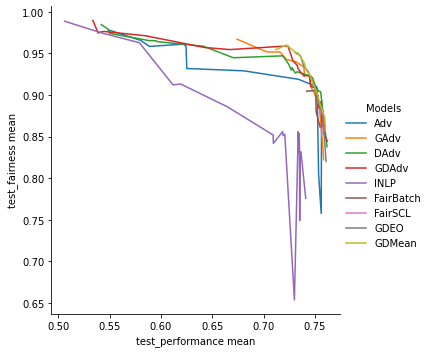

In [55]:
_final_df = model_comparasion(
    results_dict = _results_dict,
    pareto_selection="dev",
    )

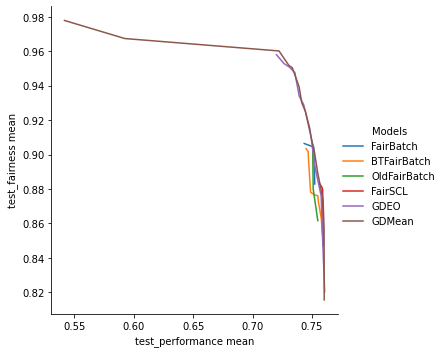

In [56]:
_results_dict = {
    "FairBatch": Moji_FairBatch_df,
    "BTFairBatch": Moji_BTFairBatch_df,
    "OldFairBatch":Moji_OldFairBatch_df,
    "FairSCL":FairSCL_df,
    "GDEO":GDEO_df,
    "GDMean":GDMean_df,
}

_final_df = model_comparasion(
    results_dict = _results_dict,
    pareto_selection="test",
    )